<a href="https://colab.research.google.com/github/royalk2c/Guj_Hand_Char_Recognition/blob/master/guj_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from __future__ import print_function
%tensorflow_version 1.x 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [26]:
batch_size = 100  
num_classes = 446  #446 characters
epochs = 40

# input image dimensions
img_rows, img_cols = 28,28

read=pd.read_csv("/content/drive/My Drive/DT/CSV File/train_28_split.csv").values
arr=np.array
arr = read.reshape(29890,28,28,1)
x_train=arr
readt=pd.read_csv("/content/drive/My Drive/DT/CSV File/test_28_split.csv").values
arrt=np.array
arrt = readt.reshape(17,28,28,1)
x_test=arrt
y_train=pd.read_csv("/content/drive/My Drive/DT/CSV File/train_28_split_label.csv").values
y_test=pd.read_csv("/content/drive/My Drive/DT/CSV File/test_28_split_label.csv").values

# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1], ' (i.e) ',score[1]*100)

x_train shape: (29890, 28, 28, 1)
29890 train samples
17 test samples
Train on 29890 samples, validate on 17 samples
Epoch 1/40
29890/29890 [==============================] - 3s 96us/step - loss: 5.6972 - acc: 0.0161 - val_loss: 5.4265 - val_acc: 0.0000e+00
Epoch 2/40
29890/29890 [==============================] - 2s 81us/step - loss: 5.0635 - acc: 0.0711 - val_loss: 4.4552 - val_acc: 0.1176
Epoch 3/40
29890/29890 [==============================] - 2s 81us/step - loss: 4.6288 - acc: 0.1120 - val_loss: 3.6506 - val_acc: 0.2941
Epoch 4/40
29890/29890 [==============================] - 2s 79us/step - loss: 4.3015 - acc: 0.1497 - val_loss: 3.1845 - val_acc: 0.3529
Epoch 5/40
29890/29890 [==============================] - 2s 79us/step - loss: 4.0127 - acc: 0.1802 - val_loss: 2.7139 - val_acc: 0.4118
Epoch 6/40
29890/29890 [==============================] - 2s 79us/step - loss: 3.7666 - acc: 0.2090 - val_loss: 2.3264 - val_acc: 0.5294
Epoch 7/40
29890/29890 [==============================] -

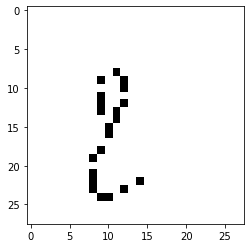

Predicted character is: 1


In [27]:
dictionary = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'અ', 11: 'અં', 12: 'અઃ', 13: 'આ', 14: 'ઇ', 15: 'ઈ', 16: 'ઉ', 17: 'ઊ', 18: 'ઋ', 19: 'એ', 20: 'ઐ', 21: 'ઓ', 22: 'ઔ', 23: 'ક', 24: 'કં', 25: 'કઃ', 26: 'કા', 27: 'કિ', 28: 'કી', 29: 'કુ', 30: 'કૂ', 31: 'કૃ', 32: 'કે', 33: 'કૈ', 34: 'કો', 35: 'કૌ', 36: 'ક્ષ', 37: 'ક્ષં', 38: 'ક્ષઃ', 39: 'ક્ષા', 40: 'ક્ષિ', 41: 'ક્ષી', 42: 'ક્ષુ', 43: 'ક્ષૂ', 44: 'ક્ષે', 45: 'ક્ષૈ', 46: 'ક્ષો', 47: 'ક્ષૌ', 48: 'ખ', 49: 'ખં', 50: 'ખઃ', 51: 'ખા', 52: 'ખિ', 53: 'ખી', 54: 'ખુ', 55: 'ખૂ', 56: 'ખે', 57: 'ખૈ', 58: 'ખો', 59: 'ખૌ', 60: 'ગ', 61: 'ગં', 62: 'ગઃ', 63: 'ગા', 64: 'ગિ', 65: 'ગી', 66: 'ગુ', 67: 'ગૂ', 68: 'ગે', 69: 'ગૈ', 70: 'ગો', 71: 'ગૌ', 72: 'ઘ', 73: 'ઘં', 74: 'ઘઃ', 75: 'ઘા', 76: 'ઘિ', 77: 'ઘી', 78: 'ઘુ', 79: 'ઘૂ', 80: 'ઘે', 81: 'ઘૈ', 82: 'ઘો', 83: 'ઘૌ', 84: 'ચ', 85: 'ચં', 86: 'ચઃ', 87: 'ચા', 88: 'ચિ', 89: 'ચી', 90: 'ચુ', 91: 'ચૂ', 92: 'ચે', 93: 'ચૈ', 94: 'ચો', 95: 'ચૌ', 96: 'છ', 97: 'છં', 98: 'છઃ', 99: 'છા', 100: 'છિ', 101: 'છી', 102: 'છુ', 103: 'છૂ', 104: 'છે', 105: 'છૈ', 106: 'છો', 107: 'છૌ', 108: 'જ', 109: 'જઃ', 110: 'જા', 111: 'જિ', 112: 'જી', 113: 'જુ', 114: 'જૂ', 115: 'જે', 116: 'જૈ', 117: 'જો', 118: 'જૌ', 119: 'જ્ઞ', 120: 'જ્ઞં', 121: 'જ્ઞઃ', 122: 'જ્ઞા', 123: 'જ્ઞિ', 124: 'જ્ઞી', 125: 'જ્ઞુ', 126: 'જ્ઞૂ', 127: 'જ્ઞે', 128: 'જ્ઞૈ', 129: 'જ્ઞો', 130: 'જ્ઞૌ', 131: 'ઝ', 132: 'ઝં', 133: 'ઝઃ', 134: 'ઝા', 135: 'ઝિ', 136: 'ઝી', 137: 'ઝુ', 138: 'ઝૂ', 139: 'ઝે', 140: 'ઝૈ', 141: 'ઝો', 142: 'ઝૌ', 143: 'ઞ', 144: 'ટ', 145: 'ટં', 146: 'ટઃ', 147: 'ટા', 148: 'ટિ', 149: 'ટી', 150: 'ટુ', 151: 'ટૂ', 152: 'ટે', 153: 'ટૈ', 154: 'ટો', 155: 'ટૌ', 156: 'ઠ', 157: 'ઠં', 158: 'ઠઃ', 159: 'ઠા', 160: 'ઠિ', 161: 'ઠી', 162: 'ઠુ', 163: 'ઠૂ', 164: 'ઠે', 165: 'ઠૈ', 166: 'ઠો', 167: 'ઠૌ', 168: 'ડ', 169: 'ડં', 170: 'ડઃ', 171: 'ડા', 172: 'ડિ', 173: 'ડી', 174: 'ડુ', 175: 'ડૂ', 176: 'ડે', 177: 'ડૈ', 178: 'ડો', 179: 'ડૌ', 180: 'ઢ', 181: 'ઢં', 182: 'ઢઃ', 183: 'ઢા', 184: 'ઢિ', 185: 'ઢી', 186: 'ઢુ', 187: 'ઢૂ', 188: 'ઢે', 189: 'ઢૈ', 190: 'ઢો', 191: 'ઢૌ', 192: 'ણ', 193: 'ણં', 194: 'ણઃ', 195: 'ણા', 196: 'ણિ', 197: 'ણી', 198: 'ણુ', 199: 'ણૂ', 200: 'ણે', 201: 'ણૈ', 202: 'ણો', 203: 'ણૌ', 204: 'ત', 205: 'તં', 206: 'તઃ', 207: 'તા', 208: 'તિ', 209: 'તી', 210: 'તુ', 211: 'તૂ', 212: 'તે', 213: 'તૈ', 214: 'તો', 215: 'તૌ', 216: 'ત્ર', 217: 'ત્રં', 218: 'ત્રા', 219: 'ત્રિ', 220: 'ત્રી', 221: 'ત્રુ', 222: 'ત્રૂ', 223: 'ત્રે', 224: 'ત્રૈ', 225: 'ત્રો', 226: 'ત્રૌ', 227: 'થ', 228: 'થં', 229: 'થઃ', 230: 'થા', 231: 'થિ', 232: 'થી', 233: 'થુ', 234: 'થૂ', 235: 'થે', 236: 'થૈ', 237: 'થો', 238: 'થૌ', 239: 'દ', 240: 'દં', 241: 'દઃ', 242: 'દા', 243: 'દિ', 244: 'દી', 245: 'દુ', 246: 'દૂ', 247: 'દે', 248: 'દૈ', 249: 'દો', 250: 'દૌ', 251: 'દ્ર', 252: 'ધ', 253: 'ધં', 254: 'ધઃ', 255: 'ધા', 256: 'ધિ', 257: 'ધી', 258: 'ધુ', 259: 'ધૂ', 260: 'ધે', 261: 'ધૈ', 262: 'ધો', 263: 'ધૌ', 264: 'ન', 265: 'નં', 266: 'નઃ', 267: 'ના', 268: 'નિ', 269: 'ની', 270: 'નુ', 271: 'નૂ', 272: 'ને', 273: 'નૈ', 274: 'નો', 275: 'નૌ', 276: 'પ', 277: 'પં', 278: 'પઃ', 279: 'પા', 280: 'પિ', 281: 'પી', 282: 'પુ', 283: 'પૂ', 284: 'પે', 285: 'પૈ', 286: 'પો', 287: 'પૌ', 288: 'ફ', 289: 'ફં', 290: 'ફઃ', 291: 'ફા', 292: 'ફિ', 293: 'ફી', 294: 'ફુ', 295: 'ફૂ', 296: 'ફે', 297: 'ફૈ', 298: 'ફો', 299: 'ફૌ', 300: 'બ', 301: 'બં', 302: 'બઃ', 303: 'બા', 304: 'બિ', 305: 'બી', 306: 'બુ', 307: 'બૂ', 308: 'બે', 309: 'બૈ', 310: 'બો', 311: 'બૌ', 312: 'ભ', 313: 'ભં', 314: 'ભઃ', 315: 'ભા', 316: 'ભિ', 317: 'ભી', 318: 'ભુ', 319: 'ભૂ', 320: 'ભે', 321: 'ભૈ', 322: 'ભો', 323: 'ભૌ', 324: 'મ', 325: 'મં', 326: 'મઃ', 327: 'મા', 328: 'મિ', 329: 'મી', 330: 'મુ', 331: 'મૂ', 332: 'મે', 333: 'મૈ', 334: 'મો', 335: 'મૌ', 336: 'ય', 337: 'યં', 338: 'યઃ', 339: 'યા', 340: 'યિ', 341: 'યી', 342: 'યુ', 343: 'યૂ', 344: 'યે', 345: 'યૈ', 346: 'યો', 347: 'યૌ', 348: 'ર', 349: 'રં', 350: 'રઃ', 351: 'રા', 352: 'રિ', 353: 'રી', 354: 'રુ', 355: 'રૂ', 356: 'રે', 357: 'રૈ', 358: 'રો', 359: 'રૌ', 360: 'લ', 361: 'લં', 362: 'લઃ', 363: 'લા', 364: 'લિ', 365: 'લી', 366: 'લુ', 367: 'લૂ', 368: 'લે', 369: 'લૈ', 370: 'લો', 371: 'લૌ', 372: 'ળ', 373: 'ળં', 374: 'ળઃ', 375: 'ળા', 376: 'ળિ', 377: 'ળી', 378: 'ળુ', 379: 'ળૂ', 380: 'ળે', 381: 'ળૈ', 382: 'ળો', 383: 'ળૌ', 384: 'વ', 385: 'વં', 386: 'વઃ', 387: 'વા', 388: 'વિ', 389: 'વી', 390: 'વુ', 391: 'વૂ', 392: 'વે', 393: 'વૈ', 394: 'વો', 395: 'વૌ', 396: 'શ', 397: 'શં', 398: 'શઃ', 399: 'શા', 400: 'શિ', 401: 'શી', 402: 'શુ', 403: 'શૂ', 404: 'શે', 405: 'શૈ', 406: 'શો', 407: 'શૌ', 408: 'શ્ર', 409: 'શ્રા', 410: 'ષ', 411: 'ષં', 412: 'ષઃ', 413: 'ષા', 414: 'ષિ', 415: 'ષી', 416: 'ષુ', 417: 'ષૂ', 418: 'ષે', 419: 'ષૈ', 420: 'ષો', 421: 'ષૌ', 422: 'સ', 423: 'સં', 424: 'સઃ', 425: 'સા', 426: 'સિ', 427: 'સી', 428: 'સુ', 429: 'સૂ', 430: 'સે', 431: 'સૈ', 432: 'સો', 433: 'સૌ', 434: 'હ', 435: 'હં', 436: 'હઃ', 437: 'હા', 438: 'હિ', 439: 'હી', 440: 'હુ', 441: 'હૂ', 442: 'હે', 443: 'હૈ', 444: 'હો', 445: 'હૌ'}
example = x_test[2]
prediction = model.predict(example.reshape(1,28,28, 1))
#print (prediction)
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
#print (hard_maxed_prediction)

plt.imshow(example.reshape(28,28), cmap="gray")
plt.show()

print('Predicted character is:',dictionary[np.argmax(prediction)])